<a href="https://colab.research.google.com/github/kdj0712/study_data_analytics/blob/main/docs/quests/DDA/SpineSurgeryList_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import pandas as pd

In [3]:
df_SSL = pd.read_csv('sample_data/SpineSurgeryList.csv')

In [ ]:
pd.read_csv('sample_data/SpineSurgeryList.csv')

In [ ]:
df_SSL.info()

In [8]:
df_SSL['입원일자_datetime'] = pd.to_datetime(df_SSL['입원일자'],format="%Y%m%d")

In [9]:
df_SSL['퇴원일자_datetime'] = pd.to_datetime(df_SSL['퇴원일자'],format="%Y%m%d")

In [153]:
df_SSL['입원일수계산_datetime'] = df_SSL['퇴원일자_datetime'] - df_SSL['입원일자_datetime']
df_SSL['입원일수계산_datetime'] = df_SSL['입원일수계산_datetime'].dt.days

In [165]:
df_SSL.describe()

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추전방위증,입원일수계산_datetime,수술일자_datetime_month,수술일자_datetime_day,수술일자_datetime_week
count,1894.000000,1894.000000,1894.000000,462.000000,1843.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,...,1893.000000,1894.000000,998.000000,1893.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.0
mean,946.500000,39.270750,2.295671,31.142857,0.049919,0.020063,0.130940,0.302534,0.062830,0.004224,...,15.287934,0.056494,-1.507325,1989.788774,4.430834,0.032207,-8.881204,5.935058,15.935058,24.067582
std,546.895023,13.675874,0.996143,10.131304,0.217836,0.140254,0.337424,0.638461,0.242721,0.064871,...,10.426397,0.230935,0.495867,314.478436,3.595680,0.176596,151.338187,3.761021,9.372409,16.366693
min,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-27.400000,0.000000,-2.840000,1145.800000,1.000000,0.000000,-2155.000000,1.000000,1.000000,1.0
25%,473.250000,30.700000,1.000000,24.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.800000,0.000000,-1.820000,1777.000000,4.000000,0.000000,1.000000,2.000000,7.000000,9.0
50%,946.500000,40.200000,2.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.500000,0.000000,-1.520000,1985.500000,4.000000,0.000000,2.000000,6.000000,16.000000,22.0
75%,1419.750000,48.600000,3.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.100000,0.000000,-1.202500,2178.500000,4.000000,0.000000,3.000000,10.000000,24.000000,40.0
max,1893.000000,89.000000,5.000000,68.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,165.000000,1.000000,1.700000,3214.200000,45.000000,1.000000,1125.000000,12.000000,31.000000,52.0


In [166]:
df_SSL['입원일수계산_datetime'].value_counts()

 2       620
 1       463
 3       384
 4       214
 0        47
        ... 
 177       1
-43        1
-730       1
-2116      1
 71        1
Name: 입원일수계산_datetime, Length: 75, dtype: int64

In [167]:
df_SSL['입원일수계산_datetime'].describe()

count    1894.000000
mean       -8.881204
std       151.338187
min     -2155.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      1125.000000
Name: 입원일수계산_datetime, dtype: float64

In [158]:
best = df_SSL.sort_values(by=['입원일수계산_datetime'],ascending=[False])[:1]

In [159]:
worst = df_SSL.sort_values(by=['입원일수계산_datetime'],ascending=[False])[1893:]

In [171]:
visual = df_SSL.sort_values(by=['입원일수계산_datetime'],ascending=[False])[:5]

In [169]:
visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1019 to 1031
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              5 non-null      int64         
 1   환자ID                    5 non-null      object        
 2   Large Lymphocyte        5 non-null      float64       
 3   Location of herniation  5 non-null      int64         
 4   ODI                     4 non-null      float64       
 5   가족력                     5 non-null      float64       
 6   간질성폐질환                  5 non-null      int64         
 7   고혈압여부                   5 non-null      int64         
 8   과거수술횟수                  5 non-null      int64         
 9   당뇨여부                    5 non-null      int64         
 10  말초동맥질환여부                5 non-null      int64         
 11  빈혈여부                    5 non-null      int64         
 12  성별                      5 non-null      int64   

In [53]:
import seaborn as sns

In [109]:
visuals = visual['입원일수계산_datetime']

In [138]:
visuals = visuals.index

Text(0.5, 1.0, '환자별 입원기간')

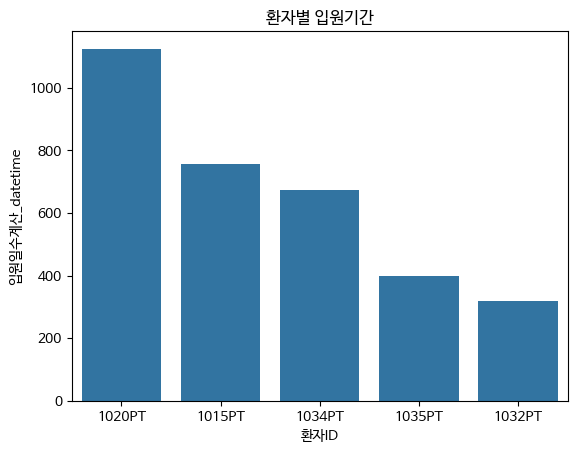

In [175]:
sns.barplot(data=visual, x='환자ID' ,y='입원일수계산_datetime')
plt.title('환자별 입원기간')

In [81]:
df_SSL['수술일자_datetime'] = pd.to_datetime(df_SSL['수술일자'],format='%Y%m%d')

In [82]:
df_SSL['수술일자_datetime'].value_counts()

2019-01-31    28
2019-01-03    20
2019-02-28    18
2019-02-01    14
2019-01-02    13
              ..
2011-01-24     1
2011-05-09     1
2019-04-28     1
2019-03-14     1
2017-04-12     1
Name: 수술일자_datetime, Length: 976, dtype: int64

In [177]:
import matplotlib.pyplot as plt

In [83]:
df_SSL['수술일자_datetime_month'] = df_SSL['수술일자_datetime'].dt.month
df_SSL['수술일자_datetime_day'] = df_SSL['수술일자_datetime'].dt.day
df_SSL['수술일자_datetime_week'] = df_SSL['수술일자_datetime'].dt.isocalendar().week

In [84]:
df_SSL['수술일자_datetime_month'].value_counts()

1     285
2     201
3     192
12    177
10    173
4     148
7     140
11    131
9     121
6     119
5     116
8      91
Name: 수술일자_datetime_month, dtype: int64

Text(0.5, 1.0, 'datetime : 월별')

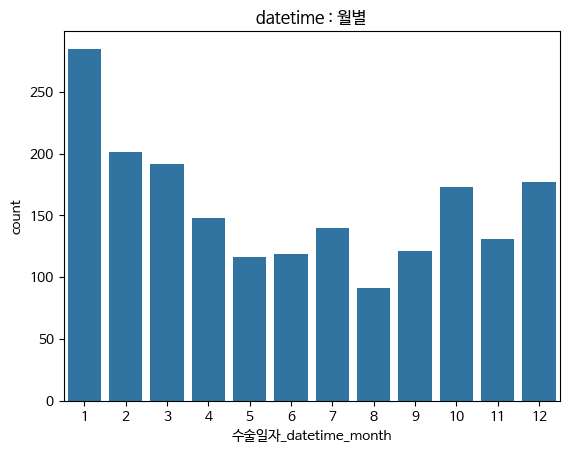

In [93]:
sns.countplot(data=df_SSL,x='수술일자_datetime_month')
plt.title('datetime : 월별')

Text(0.5, 1.0, 'datetime : 일자별')

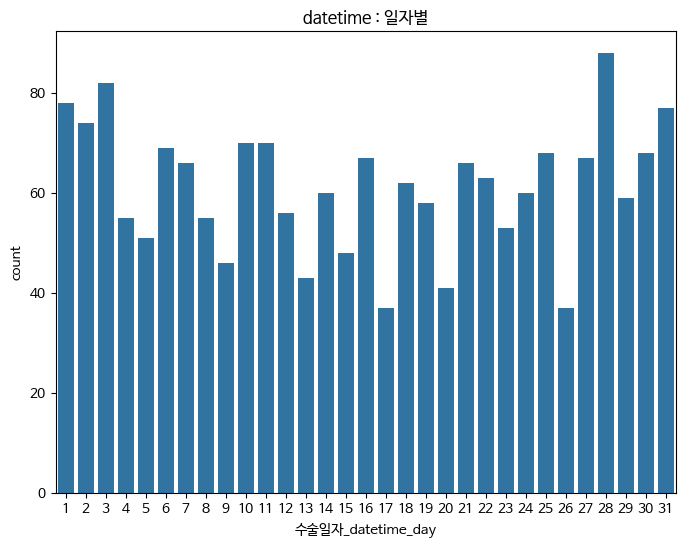

In [188]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_SSL,x='수술일자_datetime_day')
plt.title('datetime : 일자별')

Text(0.5, 1.0, 'datetime : 주차별')

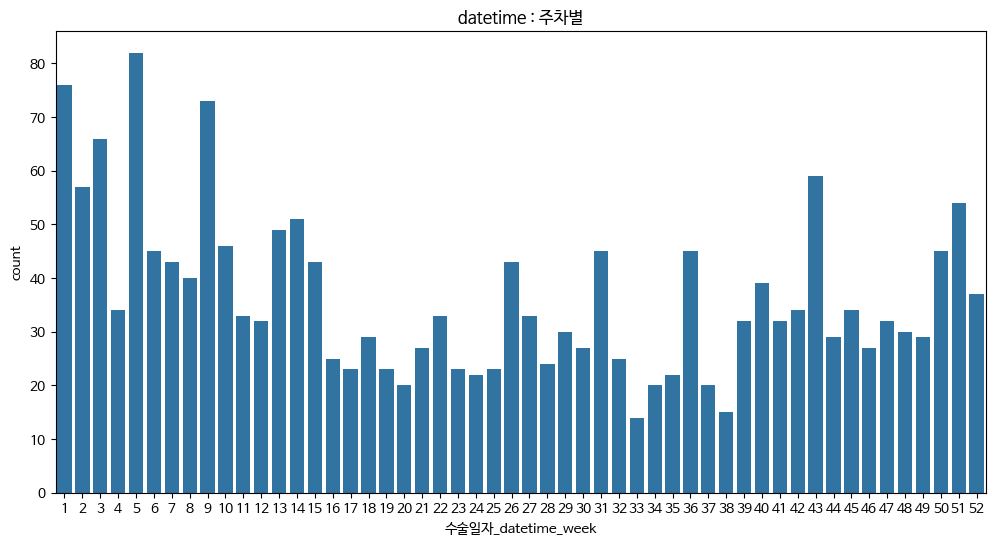

In [187]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_SSL,x='수술일자_datetime_week')
plt.title('datetime : 주차별')